<a href="https://colab.research.google.com/github/Shunl1996/CIS520/blob/hw0/hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 0

**Due Monday September 14th, 11:59 pm.**

**This is an individual assignment.**

**Submit a link to your `hw0.ipynb` file in colab to Gradescope.**


## Python Resources

We assume reasonable Python programming skills as a pre-requisite for this course. We will be using **Python 3**. If you need a refresher, the following resources are useful:

- Quick syntax guide: [Learn Python3 in Y Minutes](https://learnxinyminutes.com/docs/python3/)
- A more comprehensive course: [Google’s Python Class](https://developers.google.com/edu/python/)

Additional resources can be found on the [course wiki](https://alliance.seas.upenn.edu/~cis520/dynamic/2019/wiki/index.php?n=Resources.Resources).


## Setting Up Your Environment

We will primarily be using the following Python modules:

- [Numpy](https://www.numpy.org/) for scientific computing
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning 
- [Matplotlib](https://matplotlib.org/) for plotting and visualization

**Note that Google Colab instances have these modules installed out of the box.** If you want to stand up your own Python development environment, it should at least have these three modules and their dependencies installed. This is typically done by running the [`pip install`](https://pypi.org/project/pip/) command. For further environment management:

- [Anaconda](https://www.anaconda.com/distribution/) provides a full data science platform, including Jupyter, as well as its own package manager, [conda](https://conda.io/projects/conda/en/latest/)
- [virtualenv](https://virtualenv.pypa.io/en/latest/) is a lightweight but flexible environment management tool

## Sample Functions: Breast Cancer Classification

Confirm that you can run jupyter notebooks with the above modules by uncommenting the implementations of `train_decision_tree()` and `plot_decision_boundary()` and running the sandbox code.

*Tip: To comment/uncomment a block of selected text, highlight the text and press "Ctl-/".*

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def train_decision_tree(X, y, d=None):
  """
  Trains a decision tree classifier on the given X, y data with the specified 
  tree depth d.
  
  Args:
    X ((n,p) np.ndarray): The input Xs, which are in an n (number of samples) by
                          p (number of features) matrix
    y ((n,) np.ndarray): The input ys, which are in an n length array
    d (int): The maximum depth of the tree. A value of None means no restrictions
             on the depth of the tree.
  
  Returns:
    DecisionTreeClassifier: the trained decision tree
  """
  clf = DecisionTreeClassifier(max_depth=d, criterion="entropy")
  clf.fit(X,y)
   
  return clf


def plot_decision_boundary(X, y, clf, title, xlabel, ylabel, classes):
  """
  Plots the decision boundary of the given classifier as well as the datapoints.
  The shaded area will be the classifier's predicted decision boundaries, while
  the scatterplot will be colored by the true labels.
  
  Args:
    X ((n, 2) np.ndarray): The input feature matrix -- here we assume two features
    y ((n,) np.ndarray): The input ys, which are in an n length array
    title (str): title of the plot
    xlabel (str): plot's x-axis label -- the first feature name
    ylabel (str): plot's y-axis label -- the second feature name
    classes (list): the target class names -- here we assume binary labels
  
  Returns:
    None
  
  """
  # # Plot the decision boundary by assigning a color to each point in the mesh.
  # # Note that x and y here refer to coordinates, not our features and labels.
  x_min, x_max = (X[:, 0].min() - 1, X[:, 0].max() + 1)
  y_min, y_max = (X[:, 1].min() - 1, X[:, 1].max() + 1)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03),
                       np.arange(y_min, y_max, 0.03))
  
  # ravel() "flattens" the array in row-major order into 1D
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap='RdBu', label="test")

  # plot the datapoints themselves
  X_0 = X[y == 0, :]
  X_1 = X[y == 1, :]
  y_0 = y[y == 0]
  y_1 = y[y == 1]

  plt.scatter(X_0[:, 0], X_0[:, 1], c='red', edgecolor='black', label=classes[0])
  plt.scatter(X_1[:, 0], X_1[:, 1], c='blue', edgecolor='black', label=classes[1])
  
  # add labels
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()

### Code Sandbox

On each assignment, feel free to experiment and play with the code --- testing and verification is an important part of code development. **If there is an `.py` submission for the assignment however, be sure to comment out all your sandbox code before downloading and submitting.**

For example, after uncommenting the functions above, try running the code below to visualize the decision tree boundaries. 

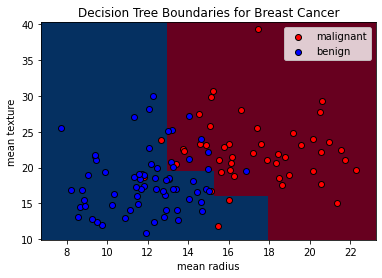

In [10]:
# # Feel free to play with the code! Just be sure to comment it all out before submitting
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# bc_data = load_breast_cancer()
# # We'll only use the first two features, mean radius and mean texture
# X = bc_data['data'][:, :2]
# y = bc_data['target']

# # We'll want to separate out a training and testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # What happens to the decision boundary if we change the max depth of the tree?
# clf = train_decision_tree(X_train,y_train, 3)

# # shaded areas are the decision tree boundaries, dots are their true labels
# plot_decision_boundary(X_test, y_test, clf, 
#                        "Decision Tree Boundaries for Breast Cancer", 
#                        bc_data['feature_names'][0], 
#                        bc_data['feature_names'][1], 
#                        bc_data['target_names'])

## Turning it in

1. Remember to save the plot output from the sandbox code and include it as a figure in your latex submission.
  
2. Submit a link to your colab notebook on gradescope. You can get a shareable link to the notebook by:
  - clicking on the share button present present in the top right corner and then click on "copy link" option. 
  
  Make sure the permissions are set such that anyone in the "University of Pennsylvania SEAS" group should be able to access the notebook. 